In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [185]:
boston = datasets.load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [186]:
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [187]:
data['PRICE'] = boston.target
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [188]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


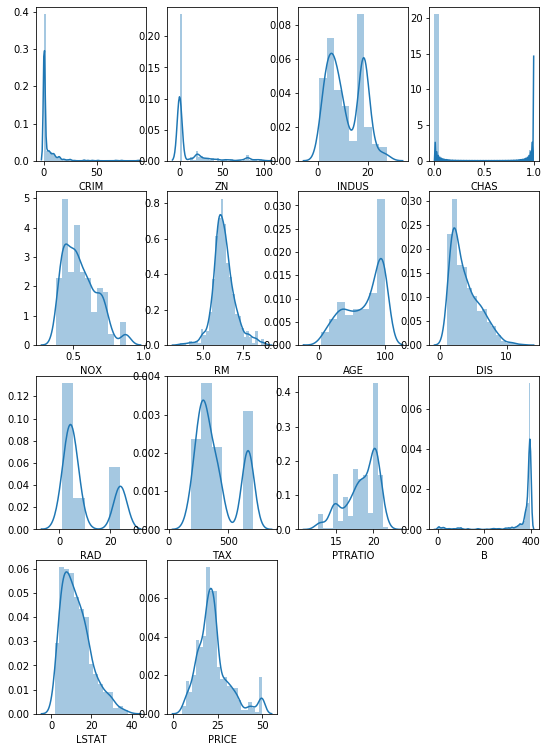

In [189]:
plt.figure(figsize=(9,13))
pt=1

for i in data:
    if pt <=14:
        plt.subplot(4,4,pt)
        sns.distplot(data[i])
        plt.xlabel(i)
    pt+=1
plt.show()    

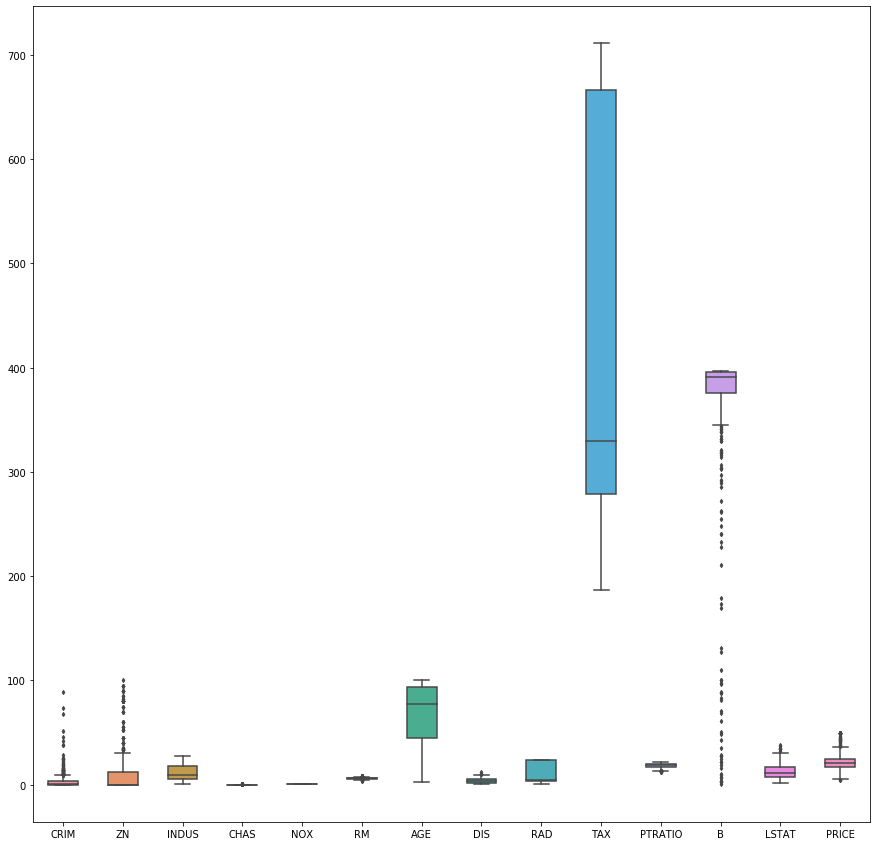

In [190]:
fig,ax= plt.subplots(figsize=(15,15))
sns.boxplot(data=data ,ax=ax,fliersize=3 ,width=.5)

In [191]:
data['CRIM']=np.log(data['CRIM'])

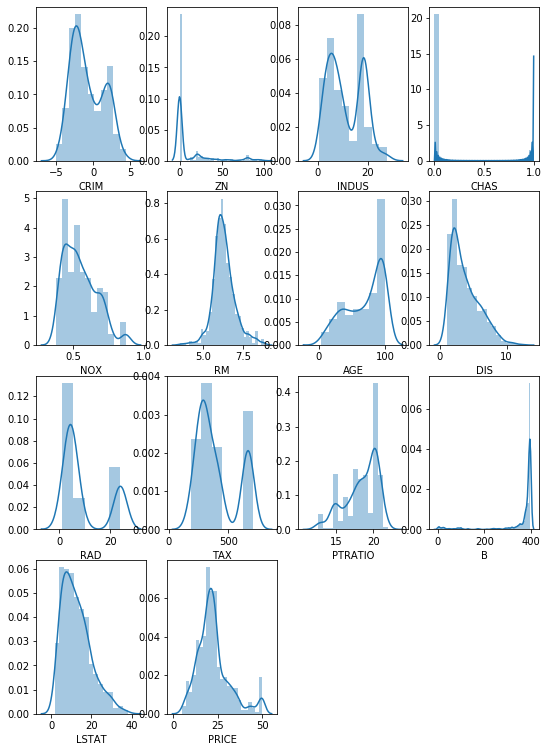

In [192]:
plt.figure(figsize=(9,13))
pt=1

for i in data:
    if pt <=14:
        plt.subplot(4,4,pt)
        sns.distplot(data[i])
        plt.xlabel(i)
    pt+=1
plt.show()  

In [193]:
x=data.drop(['PRICE'],axis=1)
y=data['PRICE']

In [194]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,-3.095111,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,-2.800824,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,-2.211009,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [195]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

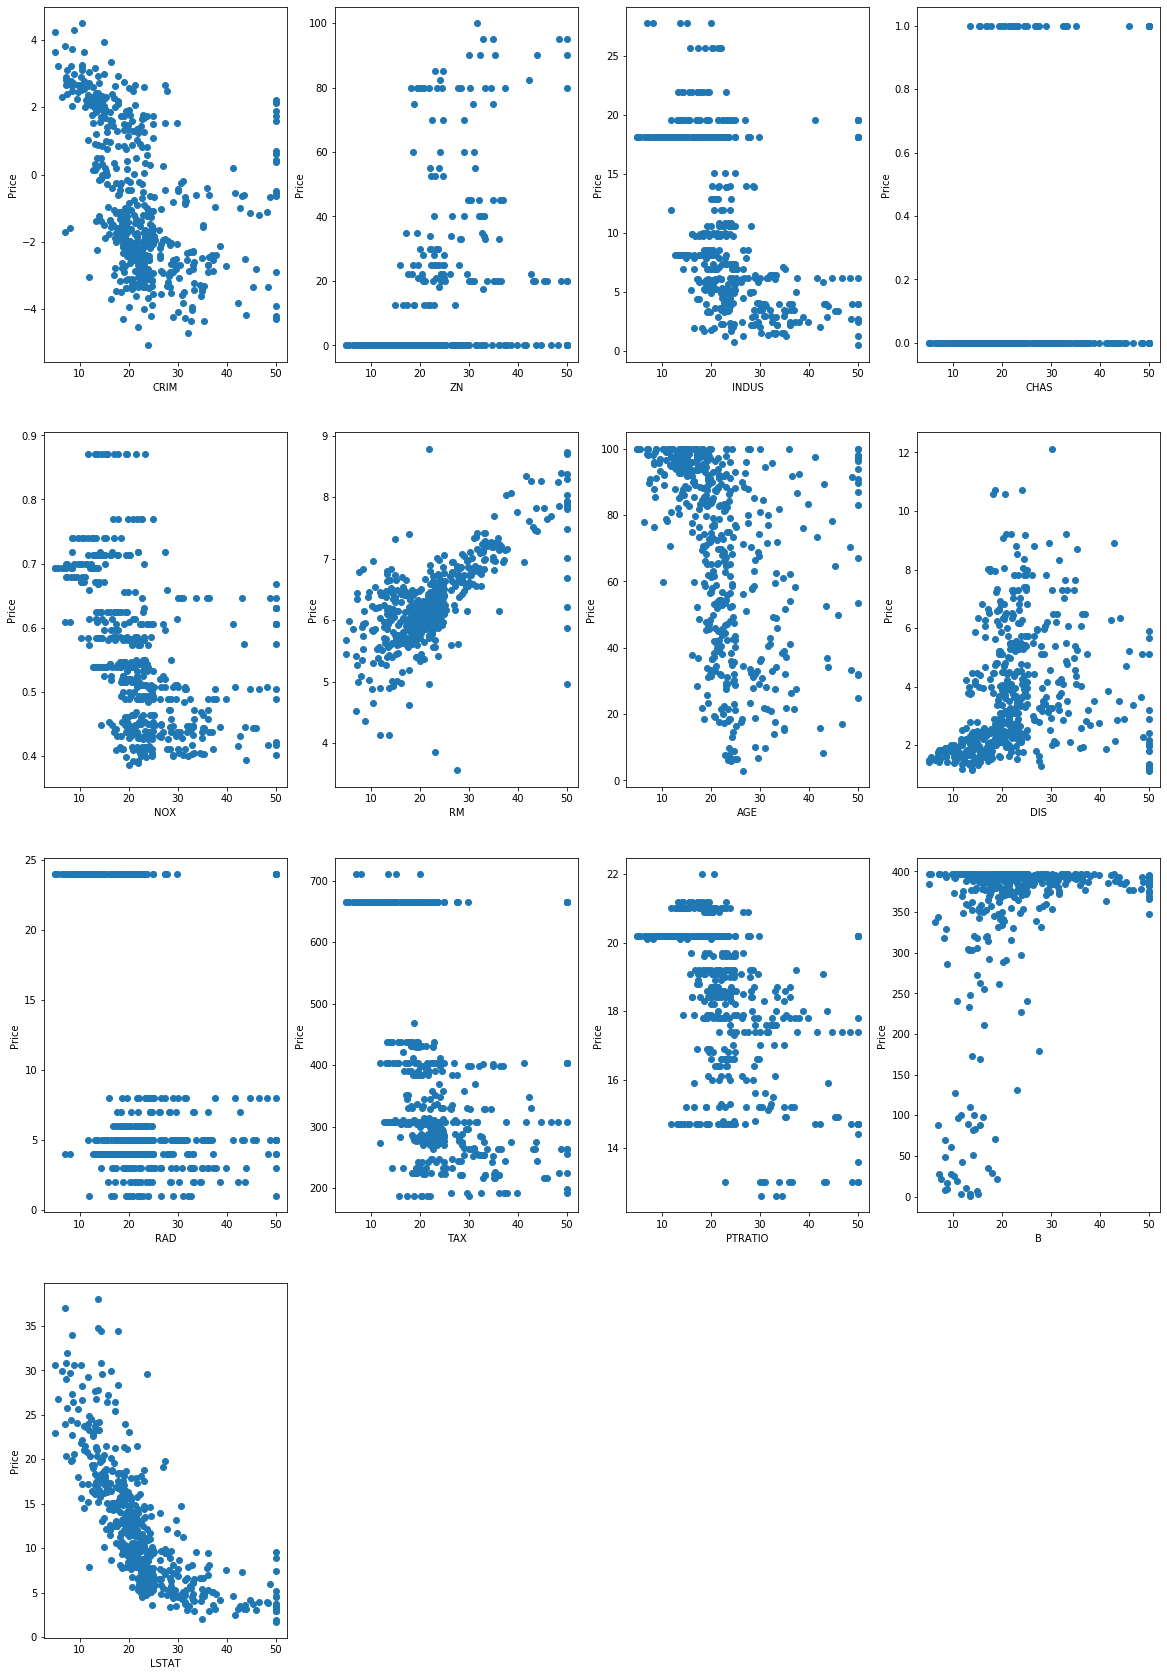

In [196]:
plt.figure(figsize=(20,30))
pt=1

for i in x:
    if pt <=14:
        plt.subplot(4,4,pt)
        plt.scatter(y,x[i] )
        plt.xlabel(i)
        plt.ylabel('Price')
    pt+=1
plt.show()  

In [197]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[-1.98322812,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-1.30563886, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-1.30597804, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.93540227, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.662329  , -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-1.05026732, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [198]:
v=x_scaled
vif=pd.DataFrame()
vif['Columns']=x.columns
vif['vif']=[variance_inflation_factor(v,i)for i in range(v.shape[1])]
vif

,Columns,vif
0,CRIM,7.991491
1,ZN,2.398781
2,INDUS,4.018445
3,CHAS,1.071344
4,NOX,4.687068
5,RM,1.932468
6,AGE,3.149461
7,DIS,3.905022
8,RAD,9.693251
9,TAX,9.010564


In [199]:
x_new=x.drop(['CRIM','RAD','TAX'],axis=1)
x_new.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33


In [200]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=.25,random_state=0)

In [201]:
print('The size of training data is : ',x_train.shape)
print('The size of testing data is : ',x_test.shape)

The size of training data is :  (379, 10)
The size of testing data is :  (127, 10)


In [202]:
rm=RandomForestRegressor()
rm.fit(x_train,y_train)

RandomForestRegressor()

In [203]:
print('The accuracy of training data is: ',rm.score(x_train,y_train))
print('The accuracy of testing data is: ',rm.score(x_test,y_test))

The accuracy of training data is:  0.9787984893164541
The accuracy of testing data is:  0.7992357578201046


In [204]:
y_pred=rm.predict(x_test)
y_pred

array([24.485, 29.784, 22.155, 11.828, 20.269, 20.606, 21.011, 20.092,
       20.803, 18.341, 10.206, 14.251, 14.144,  8.178, 46.859, 33.676,
       21.091, 35.292, 26.051, 21.25 , 23.711, 22.211, 19.895, 24.011,
       19.423, 18.509, 19.273, 15.238, 43.598, 18.536, 16.127, 17.537,
       20.121, 21.141, 24.265, 15.8  ,  8.391, 29.993, 14.072, 14.944,
       22.67 , 20.317, 25.109, 15.689, 25.213, 23.24 , 20.693, 15.054,
       14.538, 24.984, 13.886, 19.634, 21.817, 41.964, 14.952, 19.998,
       19.451, 18.735, 25.594, 20.133, 21.521, 21.278, 33.552, 28.158,
       19.33 , 27.481, 15.335, 17.591, 19.744, 22.033, 20.127, 22.9  ,
       24.442, 32.148, 26.524,  8.543, 43.478, 21.58 , 23.368, 20.685,
       26.088, 17.402, 25.365, 43.575, 43.029, 24.432, 25.105, 15.356,
       26.897, 15.124, 18.286, 12.717, 22.402, 30.48 , 22.208, 21.699,
       11.803, 23.994, 13.624, 18.519, 24.156, 19.747, 28.271, 21.024,
       28.119, 20.234,  8.334, 19.743, 22.697, 22.959, 34.13 , 13.971,
      

In [205]:
param={
    'n_estimators':[20,50,70,100],
    'max_depth': range(2,5,1),
    'min_samples_split': range(2,4,1),
    'max_features' : ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': range(1,4,1)  
}

In [206]:
grid=GridSearchCV(rm,param,verbose=3,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 5),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 4),
                         'n_estimators': [20, 50, 70, 100]},
             verbose=3)

In [207]:
print('The best param are: ',grid.best_params_)

The best param are:  {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [220]:
rm2=RandomForestRegressor(max_depth=4,max_features='auto', min_samples_leaf= 1,min_samples_split=2, n_estimators= 50)
rm2.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=50)

In [221]:
print('The accuracy of training data is: ',rm2.score(x_train,y_train))
print('The accuracy of testing data is: ',rm2.score(x_test,y_test))
y_pred2=rm2.predict(x_test)

The accuracy of training data is:  0.9225479147966096
The accuracy of testing data is:  0.7814881371539883
